# Exploratory Data Analysis

Author: Leah Francis

In [ ]:
#Loading in data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


#Loading in machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Loading the dataset into a Pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/world-university-rankings.csv')

#Viewing the first 5 rows of the dataframe
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
# This returns the last five rows of the data frame
data.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [ ]:
data.shape

(2200, 14)

# Univariate Analysis







Summary of statistics

In [ ]:
# Display summary statistics of numerical features
summary_stats = data.describe()
print(summary_stats)



        world_rank  national_rank  quality_of_education  alumni_employment  \
count  2200.000000    2200.000000           2200.000000        2200.000000   
mean    459.590909      40.278182            275.100455         357.116818   
std     304.320363      51.740870            121.935100         186.779252   
min       1.000000       1.000000              1.000000           1.000000   
25%     175.750000       6.000000            175.750000         175.750000   
50%     450.500000      21.000000            355.000000         450.500000   
75%     725.250000      49.000000            367.000000         478.000000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.00

Distribution of Numerical Features

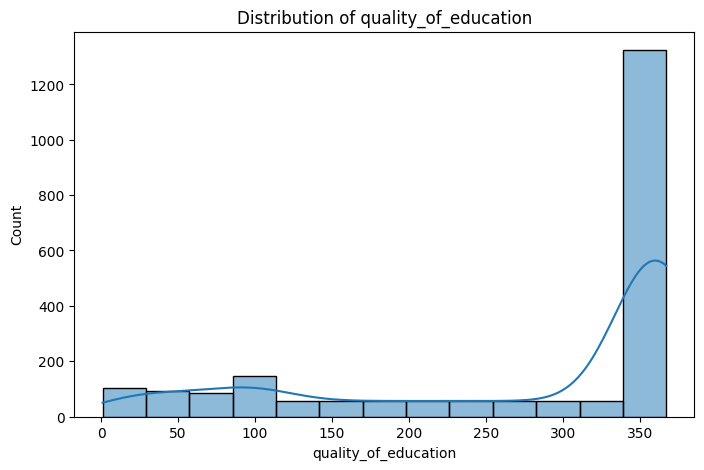

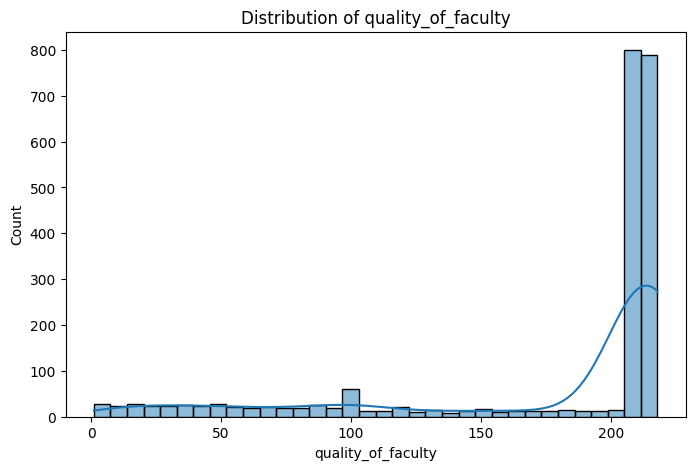

In [ ]:
# Plot the distribution of numerical features
numerical_features = ['quality_of_education', 'quality_of_faculty']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



Distribution of Categorical Features

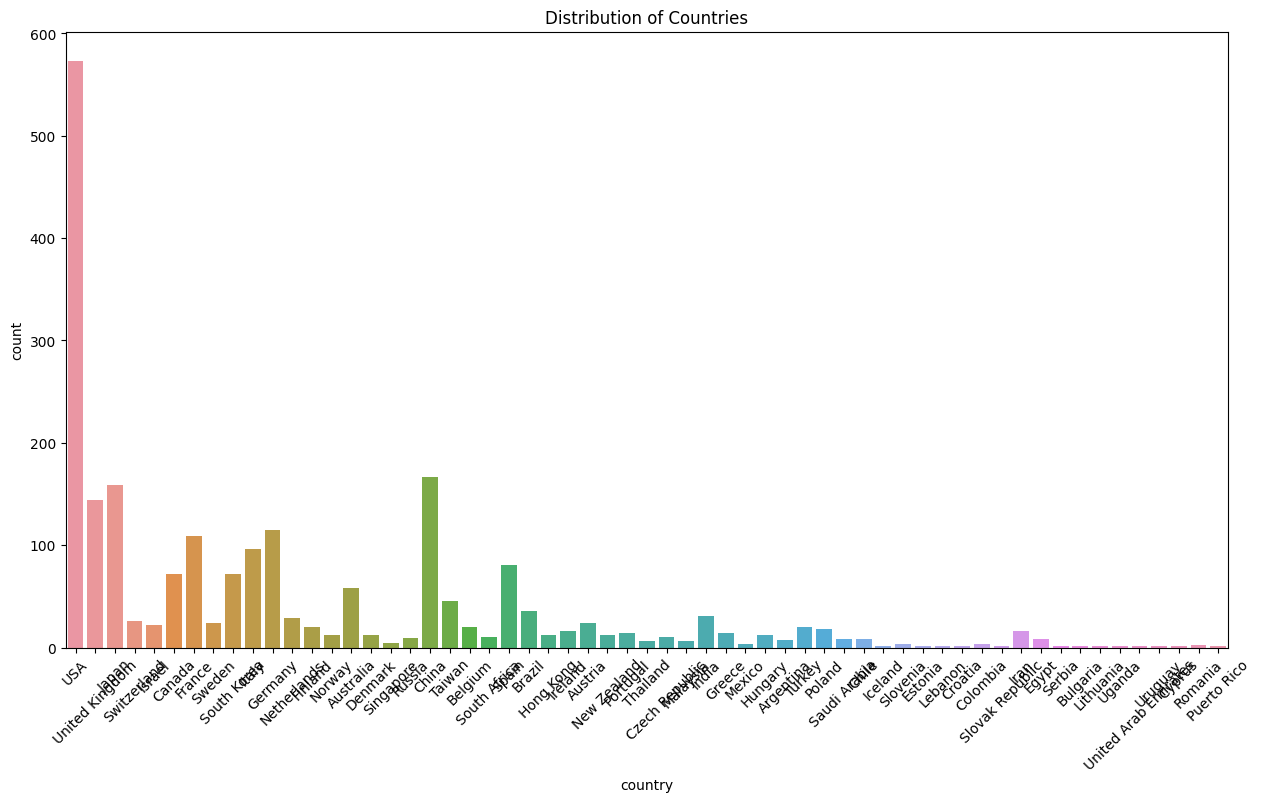

In [ ]:
# Plot the distribution of categorical features (assuming 'country' is categorical)
plt.figure(figsize=(15, 8))
sns.countplot(x='country', data=data)
plt.title('Distribution of Countries')
plt.xticks(rotation=45)
plt.show()


# Multivariate Analysis

Pairplot for Numerical Features

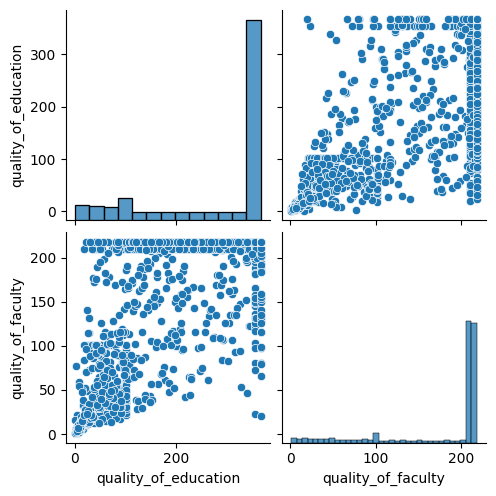

In [ ]:
# Pairplot for numerical features
numerical_features = ['quality_of_education', 'quality_of_faculty']
sns.pairplot(data[numerical_features])
plt.show()


Correlation Matrix

<ipython-input-10-84ed7cdf8e54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


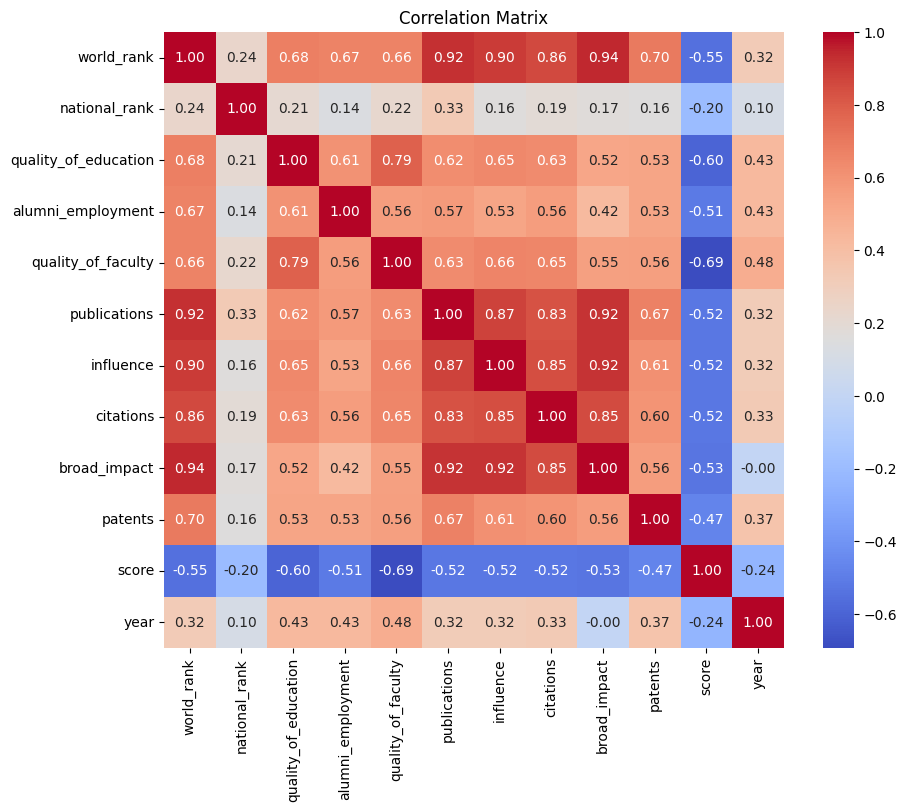

In [ ]:
# Calculate and plot the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Boxplot for Categorical Features

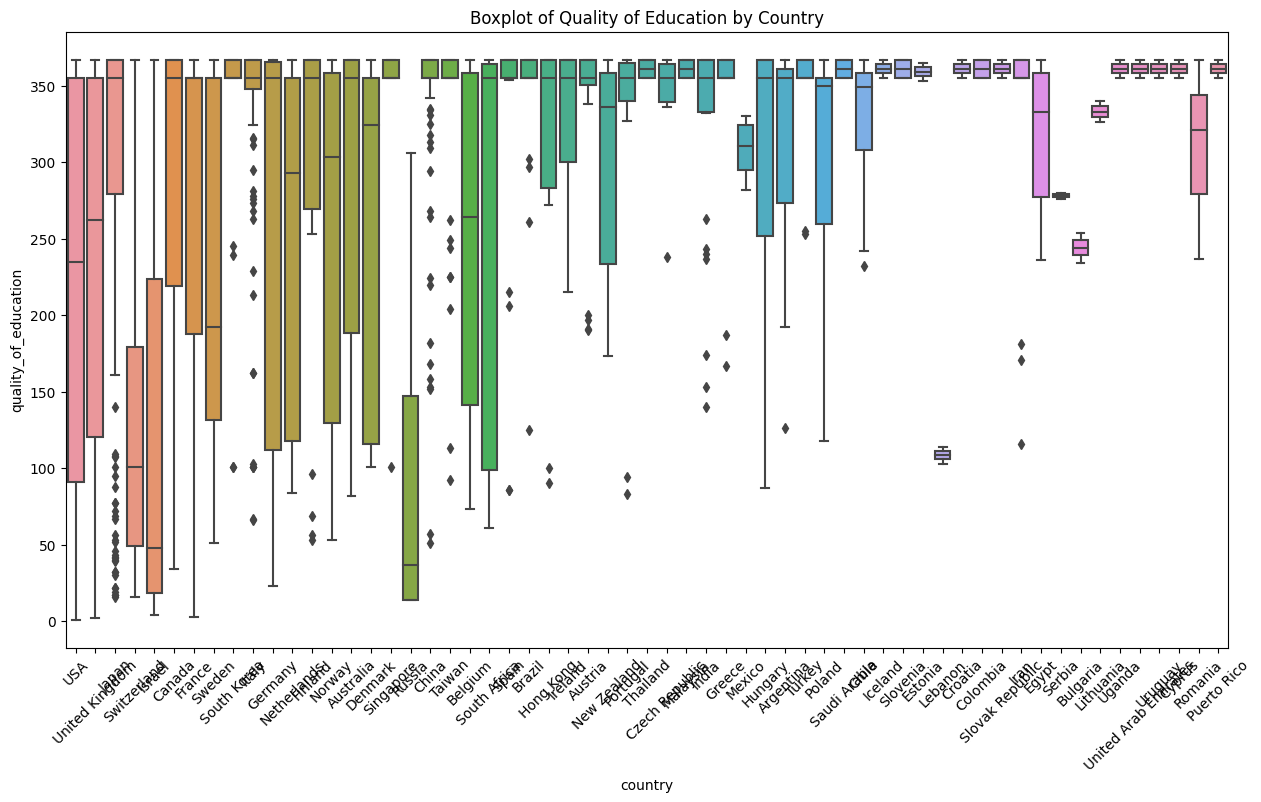

In [ ]:
# Boxplot for categorical features (assuming 'country' is categorical)
plt.figure(figsize=(15, 8))
sns.boxplot(x='country', y='quality_of_education', data=data)
plt.title('Boxplot of Quality of Education by Country')
plt.xticks(rotation=45)
plt.show()



# Data Preprocessing

In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


In [ ]:
# Handling missing values by replacing them with the mean
mean_broad_impact = data['broad_impact'].mean()
data['broad_impact'].fillna(mean_broad_impact, inplace=True)

# Verifying that there are no more missing values
missing_values_after_handling = data.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after_handling)


Missing Values After Handling:
world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [ ]:

# Defining the features and the transformers for each type of feature
numeric_features = ['quality_of_education', 'quality_of_faculty']
categorical_features = ['institution']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a binary column 'Top100' based on 'world_rank'
data['Top100'] = (data['world_rank'] <= 100).astype(int)

# Balancing the Target Variable
data_majority = data[data['Top100'] == 0]
data_minority = data[data['Top100'] == 1]

# Increasing the size of the minority class
data_minority_resampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)

# Concatenating the resampled minority class with the majority class
balanced_data = pd.concat([data_majority, data_minority_resampled])

# Resetting the index
balanced_data.reset_index(drop=True, inplace=True)

# Train-Test Split

In [ ]:
# Train-Test Split
X = balanced_data.drop('Top100', axis=1)
y = balanced_data['Top100']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model training

In [ ]:
# Model Training with preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['quality_of_education',
                                                   'quality_of_faculty']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['institution'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

# Model evaluation

In [ ]:
# Model Predictions
y_pred = model.predict(X_test)

# Performance Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9537037037037037
Precision: 0.9426386233269598
F1 Score: 0.9517374517374518
Confusion Matrix:
[[537  30]
 [ 20 493]]


# Visualisations

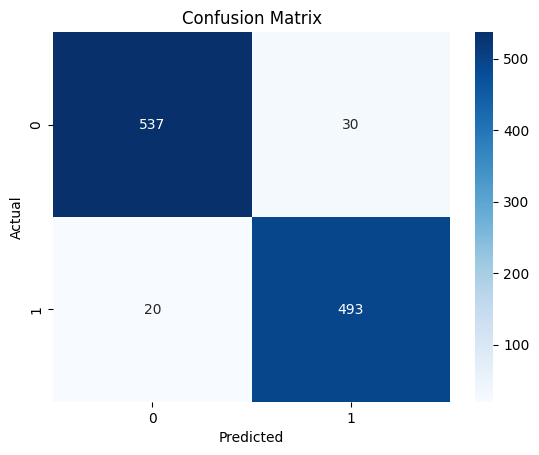

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model improvements

In [ ]:

# Define the hyperparameter grid
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__penalty': ['l1', 'l2']}

# Hyperparameter Tuning with Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'classifier__C': 1000, 'classifier__penalty': 'l1'}


# Validation

In [ ]:

# Performing k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.92222222 0.9875     0.93472222 0.97083333 0.98888889]
Mean CV Score: 0.9608333333333334


# Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       567
           1       0.94      0.96      0.95       513

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



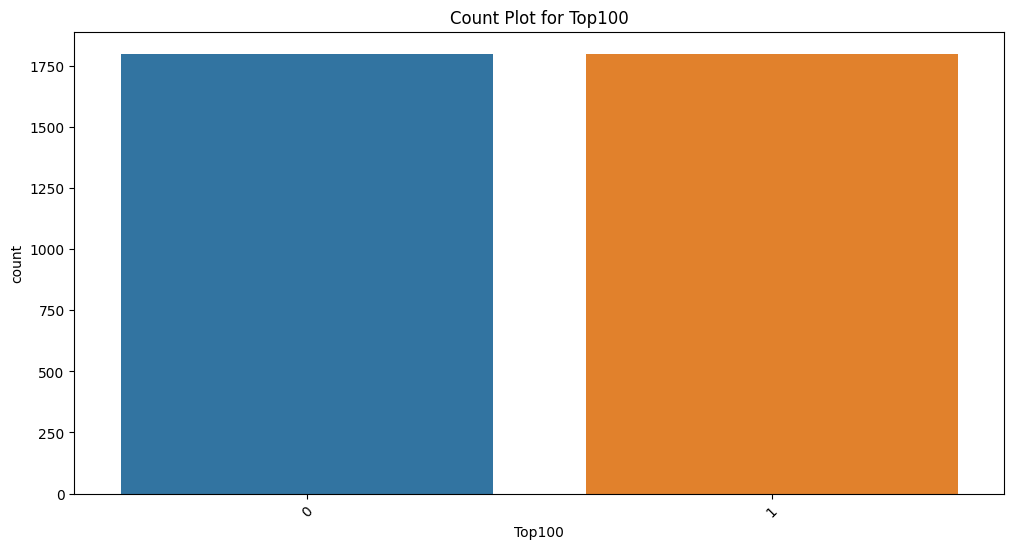

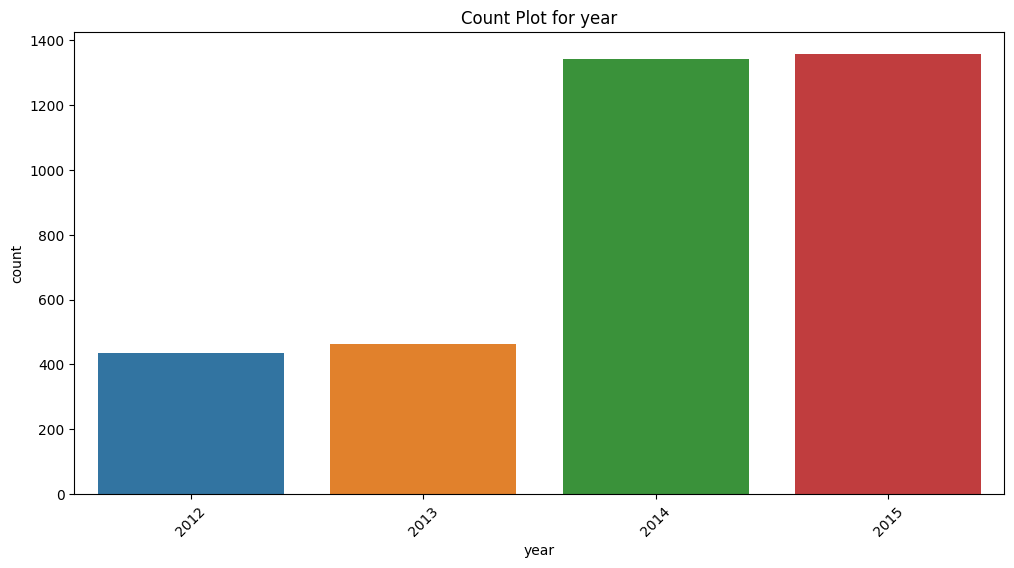

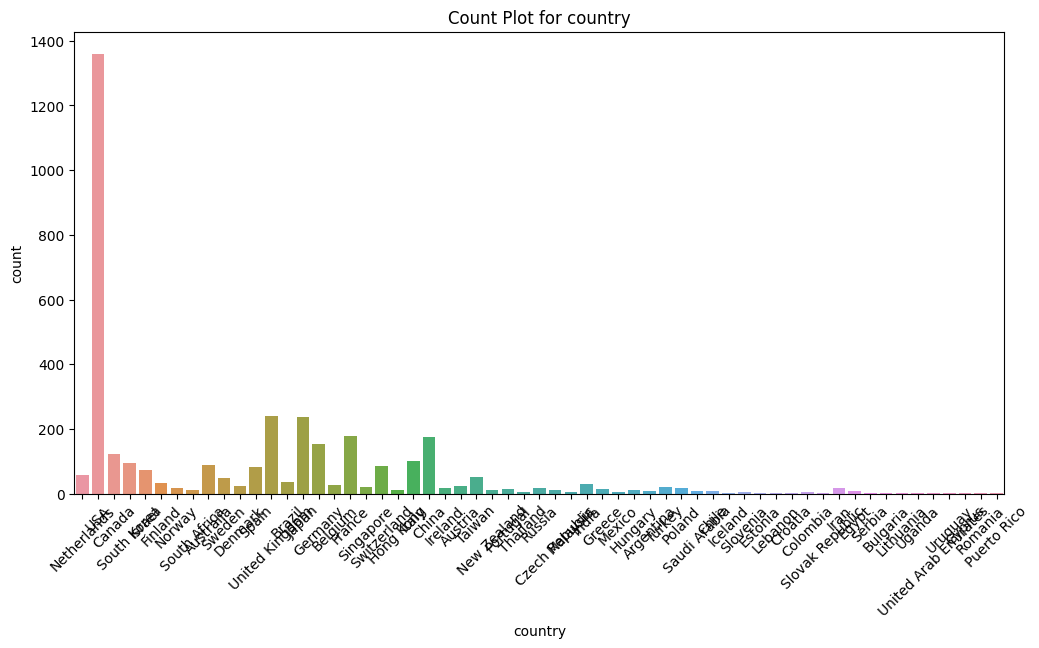

In [ ]:
# Displaying the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Count Plot for Selected Columns
selected_columns = ['Top100', 'year', 'country']

for column in selected_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=balanced_data)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

